<a href="https://colab.research.google.com/github/anishmahapatra01/01_rasa_color_cb/blob/master/Credit_Card_Fraud_Case_Study_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

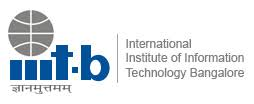


## Credit Card Fraud Case Study - CapStone Project
Authors: *Anish Mahapatra*, *Karthik Premanand*

email id: *anishmahapatra01@gmail.com, karthikprem26@gmail.com*






---




The aim of the Capstone Project is to predict fradulent credit card transactions with the help of machine learning models.


### Business Problem Overview
Business problem Overview
Banking fraud is a significant threat to the goad of retaining high profitable customers. It is an issue of substantial financial loss, both to the bank, as well as the customer. This can lead to lack of trust and credibility, which can lead to a high attrition rate. It is estimated that banking frauds account to $30 billion loss worldwide. With the rise of digital payments, the number of fraudulent transactions is also increasing in new and different ways.
In the BFSI industry, credit card fraud detection is a necessity to provide customers with proactive monitoring and fraud prevention mechanisms. Automating it helps to decrease time-consuming manual reviews, chargeback fees and denials of legitimate transactions.
 
### Problem Definition
Given a transaction, it is not immediately clear if it is a legitimate or illegitimate one. There are multiple factors at play such as the time, location, amount, frequency, last transaction time etc. among many other features. We understand that this is a binary classification problem to decide if the transaction is genuine or fraudulent.

Data from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/notebooks)

### Purpose of the notebook
The purpose of the notebook is to predict the customers that commit credit card fraud.



---


### Table of Contents

1.   Load the data, Sense Check of the Data
2.   Data Cleaning, Missing Value Treatment





In [1]:
# Importing the required packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Hide warnings

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [3]:
# Since this notebook is from Google Colab, mounting Google Drive for authentication token
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Sense Checks of the Dataset

In [4]:
# Reading the Credit Card Case Study Dataset
creditCard = pd.read_csv('/content/drive/My Drive/CreditCardFraudCaseStudy-Data/creditcard.csv')

In [5]:
# Viewing the head of the dataset - Sense Check of the dataset
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Viewing the shape of the data - (rows, columns)
creditCard.shape

(284807, 31)

In [7]:
# Summary of the dataset
print(creditCard.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Printing all the columns with atleast one null value
creditCard.columns[creditCard.isna().any()].tolist()

[]

We notice that we have 284,807 rows and 31 columns - all of them have the expected data types and there are no NULL values in the given dataset.


### Data Cleaning, Missing Value Treatment

In [9]:
# Making a copy of the dataset
df = creditCard.copy(deep=True)

In [10]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

In [11]:
# Visulalizing the percentage of missing values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': missing})

missing_df

,Feature,missing (%)
Time,Time,0.0
V1,V1,0.0
V2,V2,0.0
V3,V3,0.0
V4,V4,0.0
V5,V5,0.0
V6,V6,0.0
V7,V7,0.0
V8,V8,0.0
V9,V9,0.0


In [12]:
# Sense check of a random column
print(df['V28'].describe())

count    2.848070e+05
mean    -1.206049e-16
std      3.300833e-01
min     -1.543008e+01
25%     -5.295979e-02
50%      1.124383e-02
75%      7.827995e-02
max      3.384781e+01
Name: V28, dtype: float64


### Check for Data Imbalance of the "Class" column
1 - Fraud
0 - No Fraud

In [13]:
## Checking the count of churned customers
df['Class'].value_counts(ascending=True)

1       492
0    284315
Name: Class, dtype: int64

In [14]:
def plotFrequencyTable(df, catColName):
    '''
    This function is used to plot the frequency table of the specified categorical variable
    @df (dataframe) - Dataframe for which frequency table is to be plotted
    @catColName (string) - Column name for which frequency table is to be plotted
    '''
    sns.countplot(x=catColName, data=df)
    plt.title("Credit Card Fraud transactions")
    plt.xticks(rotation = 90)
    plt.show();

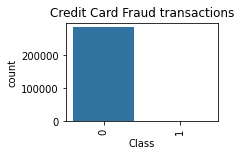

In [15]:
# plotting the frequency of 0-Normal and 1-Fraud transactions
plt.subplot(2,2,1)
plotFrequencyTable(df,'Class')


Here, we notice that the data is HIGHLY imbalanced. 

Just 0.17% (492 out of 284,807 transactions) of all transactions have been classified as fraud.

### Exploratory Data Analysis


#### Univariate and Bivariate Analysis

In [16]:
# Analysis of the target variable
df['Class'].value_counts(ascending=True)

1       492
0    284315
Name: Class, dtype: int64

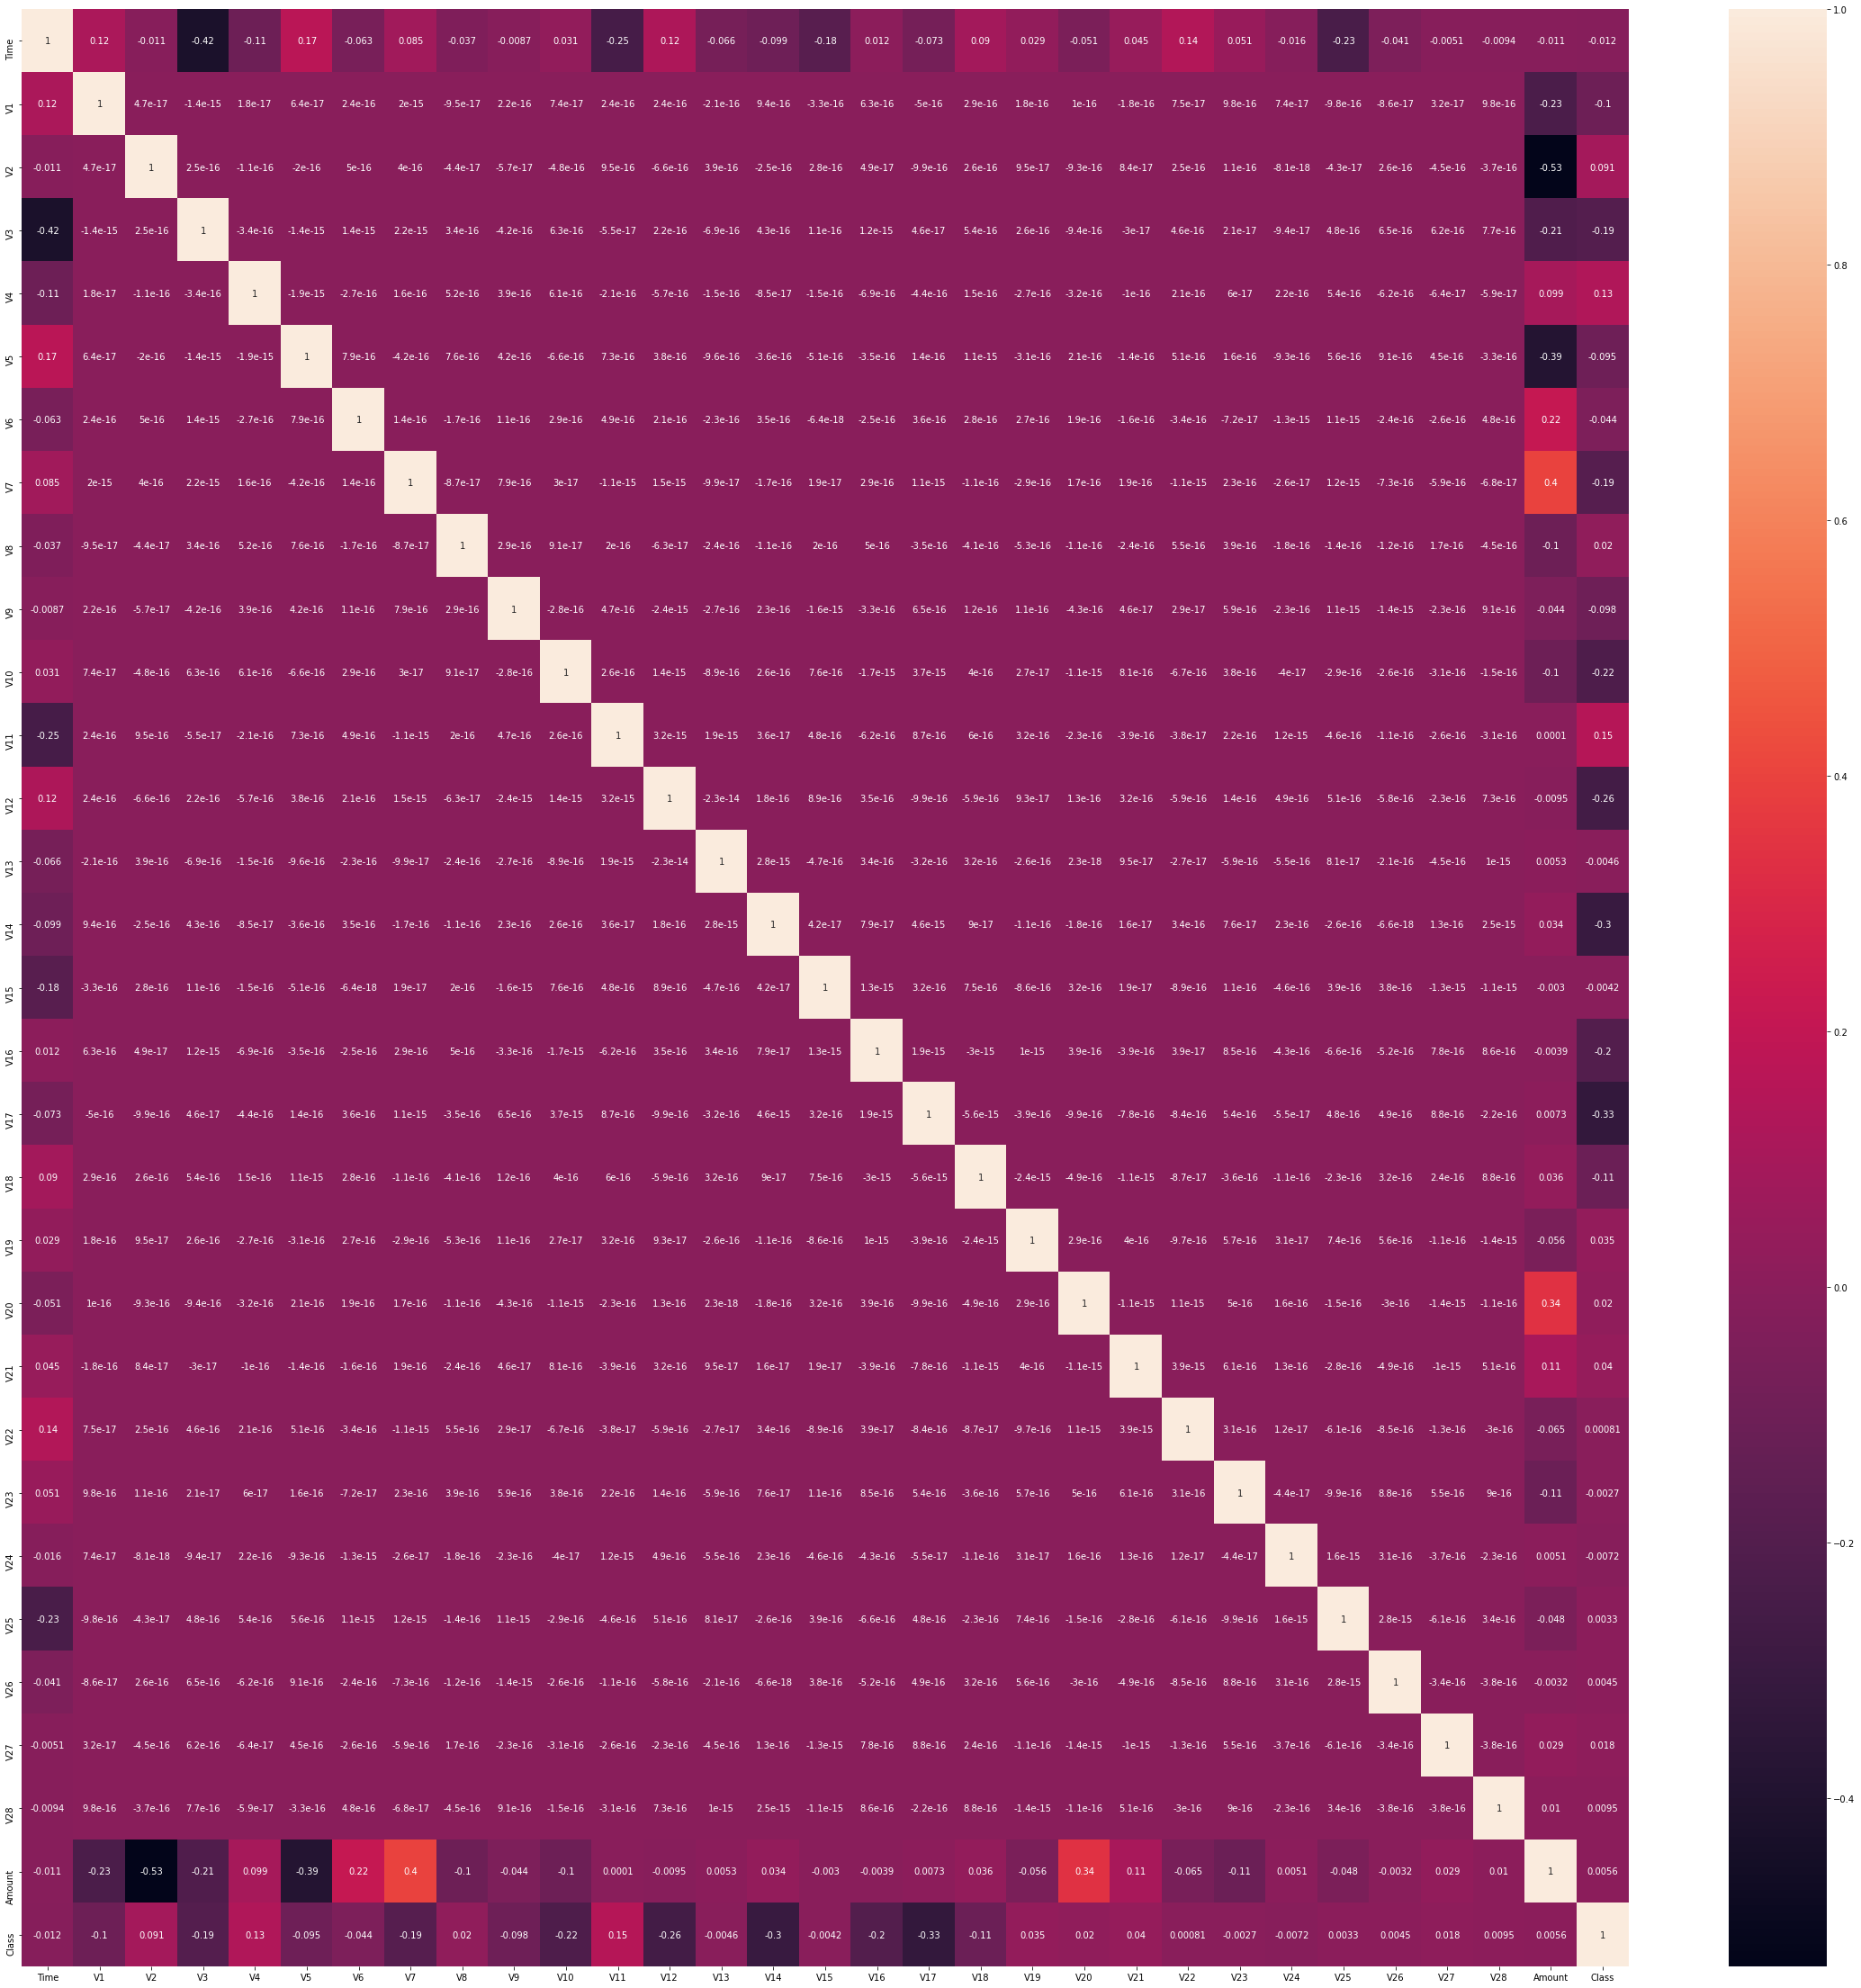

In [17]:
## Plot heatmap

# Let's see the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

#### Outlier Analysis of the Data

In [18]:
# Making a copy of the dataset
df_out = df.copy(deep = True)

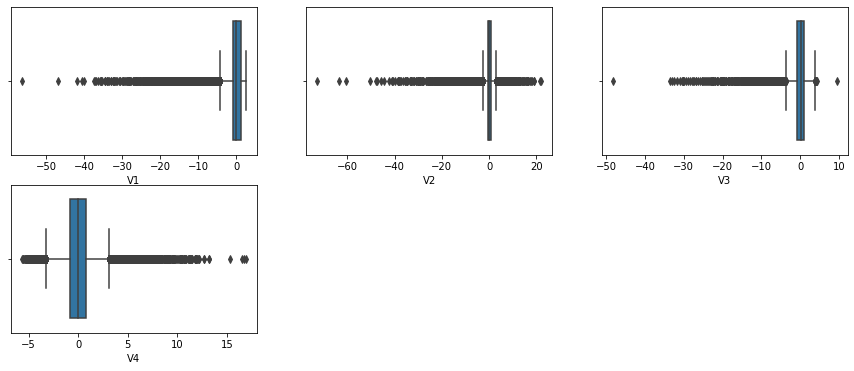

In [19]:
# Making boxplots as sub-plots to understand the trend of the data a few columns
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'V1', data = df_out)
plt.subplot(2,3,2)
sns.boxplot(x = 'V2', data = df_out)
plt.subplot(2,3,3)
sns.boxplot(x = 'V3', data = df_out)
plt.subplot(2,3,4)
sns.boxplot(x = 'V4', data = df_out)

In [20]:
# Viewing the distribution of the dataset
df_out.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here, we note that since PCA has already been performed on the column, we observe that the dataset does not have multicollinearity and the outlier analysis is acceptable as the data is the best representation of the original data, as PCA has already been performed on it.

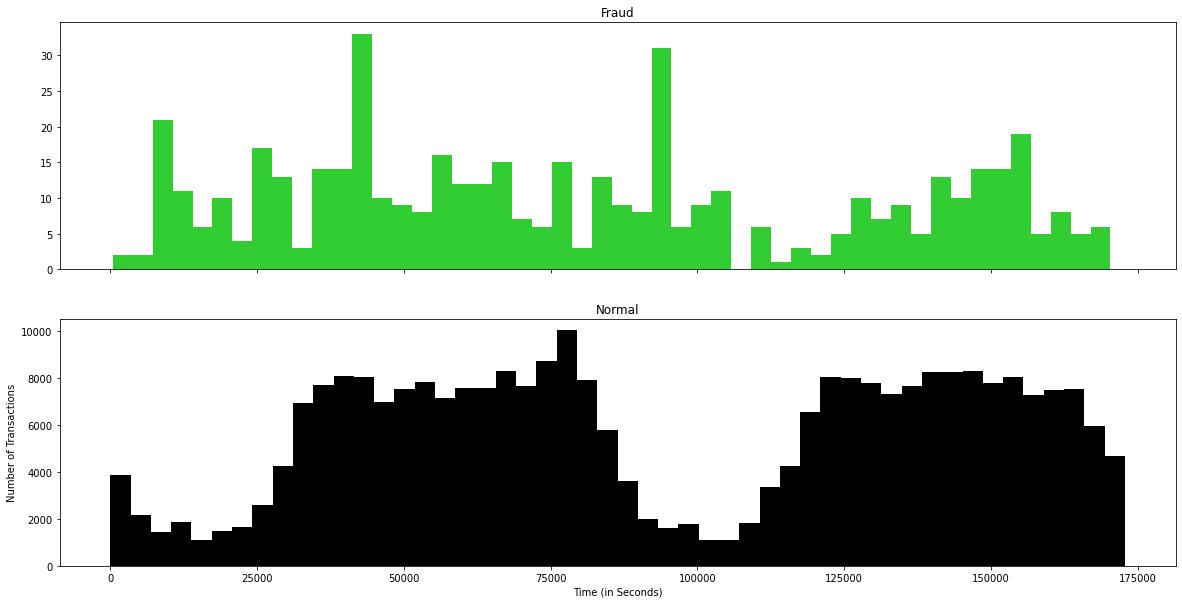

In [21]:
# Plotting the distribution of Normal and Fraudulent transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

# Binning the dataset
bins = 50

# plotting the normal transactions
ax2.hist(df.Time[df.Class == 0], bins = bins, color = 'black')
ax2.set_title('Normal')

# plotting the fraudulent transactions
ax1.hist(df.Time[df.Class == 1], bins = bins, color = 'limegreen')
ax1.set_title('Fraud')

# Adding the X-Axis label, the Y-Axis label and displaying the graph

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

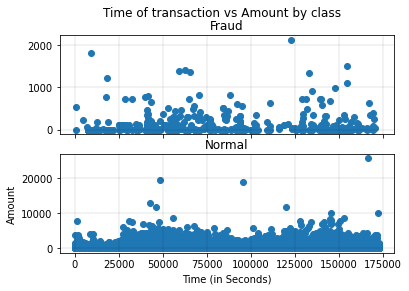

In [22]:
# Scatter Plot of Normal versus Fraud transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

# normal transactions
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

# fraud transactions
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

# Adding labels
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

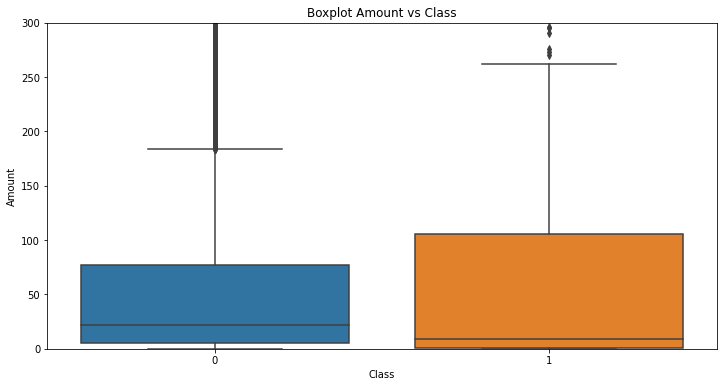

In [23]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = df)
ax.set_ylim([0, 300])
plt.title('Boxplot Amount vs Class')
plt.show()

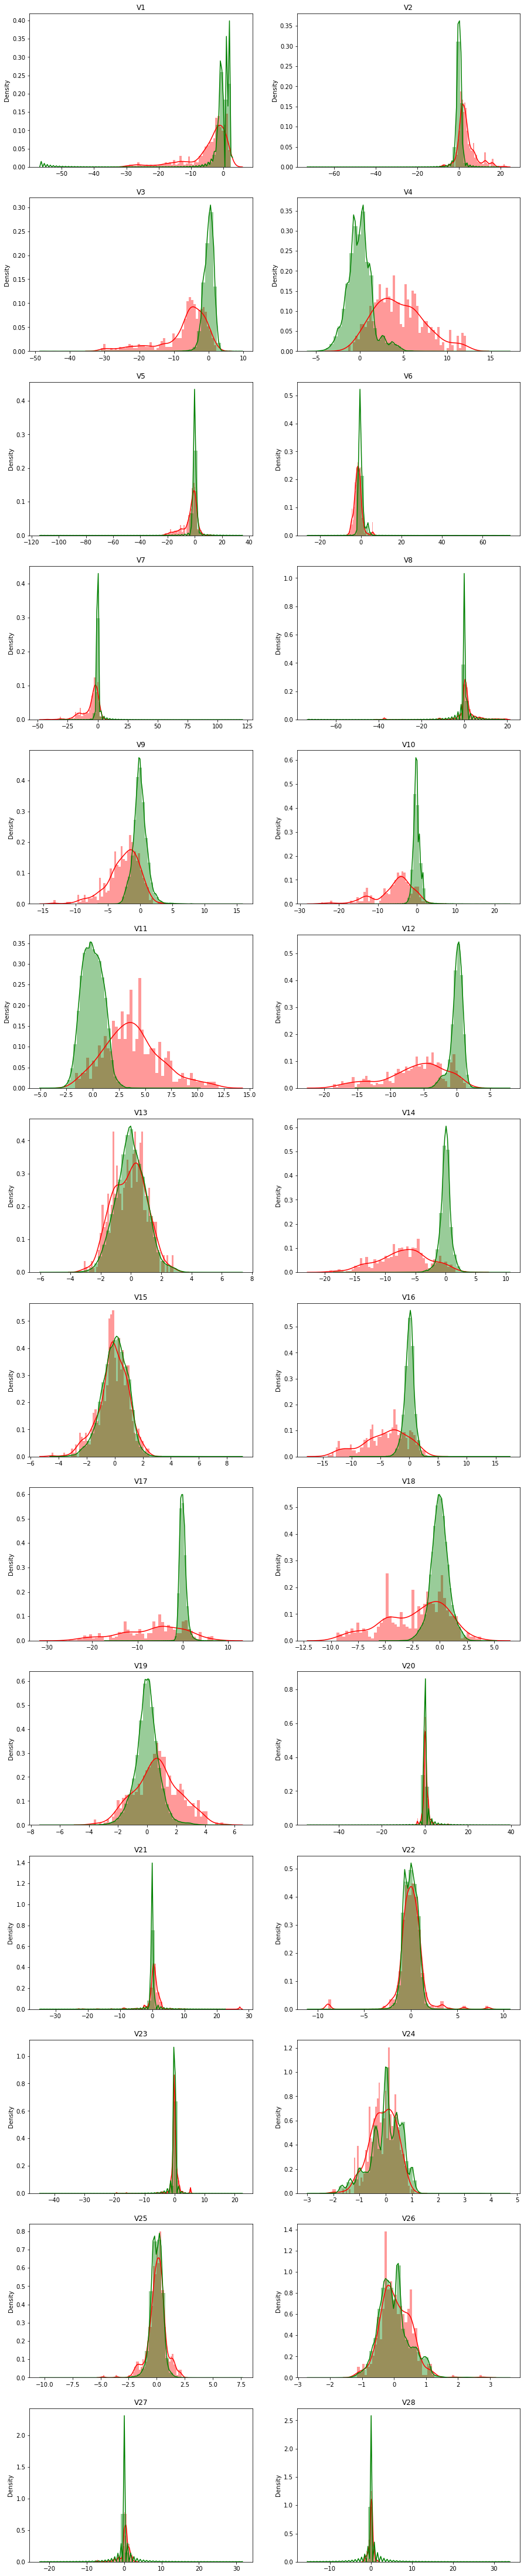

In [24]:
import matplotlib.gridspec as gridspec # to do the grid of plots

df_credit = df.copy(deep=True)
columns = df_credit.iloc[:,1:29].columns

fraudulent = df_credit.Class == 1
normaltrans = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])

    #Fraudulent transactions are marked with RED
    sns.distplot(df_credit[col][fraudulent], bins = 50, color='r') 

    # Normal Transactions are marked with green
    sns.distplot(df_credit[col][normaltrans], bins = 50, color='g')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

- We notice that for features V1, V2, V3 and V4 the class distributions are partially separable. All the distributions are highly skewed. For V4, there is more partial separatability as compared to the other features. 

- For V5 and V6, the class distributions are partially separable. For V7 and V8 the class distributions are almost overlapping and there is no clear way of separating these features based on their class labels.

- V13, V15 features are highly overlapping as far as their class label is concerned. V14 and V16 features has some partial separability as far as their class label is concerned. 

- The class distribution of these features - V21, V22, V23 and V24 are completely inseparable. The distributions are highly overlapping with no way to separate the class labels.


#### Checking for the skewness of data

In [25]:
# Understanding the skewness of the data
df.skew(axis = 0, skipna = True) 

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

From this, we notice that the following columns are skewed:
- V2
- V8
- V23
- V28

Now that we have completed EDA - univariate and bivariate analysis on the dataset, we shall proceed to handle the class imbalance.

Class imbalance for this notebook will be done via SMOTE. Since we are unsure as to whether a balanced or the original dataset will lead to better results, we shall perform the modelling on both the balanced and imbalanced dataset.

In [26]:
# Checkpoint for data
df_beforefeaturescaling = df.copy(deep = True) 

In [27]:
# Viewing the shape of the data
df.shape

(284807, 31)

In [28]:
# Viewing the head of the dataset
df_beforefeaturescaling.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
# Popping out the Class flag and renaming it as 'fraud_flag'
fraud_flag = df_beforefeaturescaling.pop("Class")

In [30]:
# Viewing the shape fo the data
df_beforefeaturescaling.shape

(284807, 30)

In [31]:
# Splitting the dataset into dependent and independent features (X and y)

X = df_beforefeaturescaling
y = fraud_flag

#### Splitting into train and test dataset

In [32]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [33]:
# Viewing the shape of the dataset
X_train.shape

(199364, 30)

In [34]:
# Viewing the shape of the dataset
y_test.shape

(85443,)

#### Dealing with Skewness of the dataset using Power Transformer


In [35]:
## We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data
## in order to ensure that our features are normally distributed.

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame())
 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

#### Feature Scaling
Here we have normalize the continous variable while keeping the binary values intact separately for train and test datasets

In [36]:
# Subsetting all the continous vairables for scaling
df = X_train
columnNames = list(df.columns.values)
contColumnNames = ['Amount', 'Time']

# Creating df with continuous variables
df_cont = df[contColumnNames]

## Creating scaled dataframe for modelling
normalized_df=(df_cont-df_cont.mean())/df_cont.std()
df = df.drop(contColumnNames, 1)
df = pd.concat([df,normalized_df],axis=1)

df.head()

X_train_scaled = df

In [37]:
# Subsetting all the continous vairables for scaling
df = X_test
columnNames = list(df.columns.values)
contColumnNames = ['Amount', 'Time']

# Creating df with continuous variables
df_cont = df[contColumnNames]

## Creating scaled dataframe for modelling
normalized_df=(df_cont-df_cont.mean())/df_cont.std()
df = df.drop(contColumnNames, 1)
df = pd.concat([df,normalized_df],axis=1)

df.head()

X_test_scaled = df

##### *Handling* Class Imbalance using SMOTE

In [38]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [39]:
# Sense check of the data with 70% train and 30% test
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (199364, 30)
y_train: (199364,)
X_test: (85443, 30)
y_test: (85443,)


Making the Balanced Dataset: X_train_balanced, y_train_balanced

## OverSampling with SMOTE

In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_balanced, y_train_balanced = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_balanced.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_balanced.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_balanced==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_balanced==0)))

Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 199014 

After OverSampling, the shape of train_X: (398028, 30)
After OverSampling, the shape of train_y: (398028,) 

After OverSampling, counts of label '1': 199014
After OverSampling, counts of label '0': 199014


In [41]:
# Sense check of data after SMOTE
print("X_train_balanced:", X_train_balanced.shape)
print("y_train:", y_train_balanced.shape)

X_train_balanced: (398028, 30)
y_train: (398028,)


### Logistic Regression 

#### Logistic Regression with Original Dataset (Imbalanced)

In [42]:
# Checking the shape of the data
X_train.shape

(199364, 30)

In [43]:
# Importing the statsmodels package 
import statsmodels.api as sm

# Logistic regression model
logreg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199333
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -725.80
Date:                Fri, 18 Sep 2020   Deviance:                       1451.6
Time:                        11:47:25   Pearson chi2:                 5.75e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2473      0.295    -27.946      0.000      -8.826      -7.669
Time       -6.096e-06   2.77e-06     -2.204      0.027   -1.15e-05   -6.76e-07
V1             0.2048      0.053      3.834      0.000       0.100       0.309
V2            -0.0747      0.067     -1.115      0.265      -0.206       0.057
V3            -0.0662      0.065     -1.014      0.311      -0.194       0.062
V4             0.6854      0.083      8.263      0.000       0.523       0.848
V5             0.0972      0.079      1.237      0.216      -0.057       0.251
V6            -0.1082      0.090     -1.201      0.230      -0.285       0.068
V7            -0.0986      0.082     -1.208      0.227      -0.259       0.061
V8            -0.2002      0.040     -4.957      0.000      -0.279      -0.121
V9            -0.4619      0.127     -3.638      0.000      -0.711      -0.213
V10           -0.8623      0.114     -7.551      0.000      -1.086      -0.638
V11           -0.1698      0.100     -1.689      0.091      -0.367       0.027
V12            0.0211      0.103      0.204      0.838      -0.181       0.223
V13           -0.3442      0.102     -3.385      0.001      -0.543      -0.145
V14           -0.6182      0.076     -8.103      0.000      -0.768      -0.469
V15           -0.2032      0.108     -1.890      0.059      -0.414       0.007
V16           -0.1570      0.139     -1.130      0.258      -0.429       0.115
V17           -0.1223      0.085     -1.447      0.148      -0.288       0.043
V18            0.0533      0.150      0.355      0.722      -0.241       0.347
V19            0.1266      0.118      1.076      0.282      -0.104       0.357
V20           -0.5751      0.108     -5.316      0.000      -0.787      -0.363
V21            0.3820      0.075      5.118      0.000       0.236       0.528
V22            0.5303      0.160      3.308      0.001       0.216       0.845
V23           -0.0574      0.072     -0.798      0.425      -0.198       0.084
V24            0.0919      0.182      0.506      0.613      -0.264       0.448
V25           -0.1094      0.166     -0.661      0.509      -0.434       0.215
V26           -0.0112      0.231     -0.049      0.961      -0.463       0.441
V27           -0.8578      0.167     -5.145      0.000      -1.185      -0.531
V28           -0.3664      0.116     -3.158      0.002      -0.594      -0.139
Amount         0.0009      0.000      1.960      0.050    1.04e-07       0.002
==============================================================================
"""

In [44]:
# Importing the required packages and instantiating the logistic regression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [45]:
# Fitting the model on the training dataset
logreg.fit(X_train, y_train)

from sklearn.feature_selection import RFE
# Outputting the top 25 features
rfe = RFE(logreg, 25)             
rfe = rfe.fit(X_train, y_train)

In [46]:
# listing the relevant features (obtained via Recursive Feature Elimination - RFE)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Time', False, 6),
 ('V1', True, 1),
 ('V2', True, 1),
 ('V3', False, 2),
 ('V4', True, 1),
 ('V5', False, 3),
 ('V6', True, 1),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', True, 1),
 ('V19', True, 1),
 ('V20', True, 1),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', True, 1),
 ('V24', True, 1),
 ('V25', True, 1),
 ('V26', False, 5),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', False, 4)]

The features that say `True` are the ones that RFE believes will be relevant to predict the price.

The features that say `False` can be given priority, with 1 being the highest, although RFE has implies that the features will not be as relevant for the model

On the basis of this, we shall remove V5 and V26. We would like to keep the time and amount column to maintain the sancticity of the data.

In [47]:
col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',\
       'V21', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28', 'Amount']

#### Model Iteration (LogReg + RFE)

In [48]:
import statsmodels.api as sm  

# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

##### Iteration 1 (LogReg) [using p-value]

In [49]:
X_train_rfe = sm.add_constant(X_train_rfe)
logreg = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199335
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.56
Date:                Fri, 18 Sep 2020   Deviance:                       1453.1
Time:                        11:47:51   Pearson chi2:                 5.89e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2945      0.293    -28.331      0.000      -8.868      -7.721
Time        -5.34e-06   2.71e-06     -1.969      0.049   -1.07e-05   -2.41e-08
V1             0.2116      0.052      4.057      0.000       0.109       0.314
V2            -0.1154      0.052     -2.211      0.027      -0.218      -0.013
V3            -0.0379      0.062     -0.613      0.540      -0.159       0.083
V4             0.6818      0.079      8.637      0.000       0.527       0.837
V6            -0.1563      0.090     -1.739      0.082      -0.332       0.020
V7            -0.1034      0.077     -1.336      0.182      -0.255       0.048
V8            -0.2190      0.037     -5.850      0.000      -0.292      -0.146
V9            -0.4950      0.117     -4.247      0.000      -0.723      -0.267
V10           -0.8354      0.109     -7.667      0.000      -1.049      -0.622
V11           -0.1566      0.100     -1.571      0.116      -0.352       0.039
V12           -0.0034      0.098     -0.034      0.972      -0.196       0.189
V13           -0.3322      0.101     -3.304      0.001      -0.529      -0.135
V14           -0.6286      0.075     -8.381      0.000      -0.776      -0.482
V15           -0.2144      0.107     -2.006      0.045      -0.424      -0.005
V16           -0.1712      0.131     -1.310      0.190      -0.427       0.085
V17           -0.0915      0.078     -1.168      0.243      -0.245       0.062
V18            0.0719      0.143      0.504      0.614      -0.208       0.351
V19            0.1116      0.113      0.985      0.324      -0.110       0.334
V20           -0.5600      0.106     -5.273      0.000      -0.768      -0.352
V21            0.3872      0.073      5.287      0.000       0.244       0.531
V22            0.5302      0.159      3.341      0.001       0.219       0.841
V23           -0.0589      0.071     -0.833      0.405      -0.197       0.080
V24            0.0548      0.186      0.295      0.768      -0.310       0.419
V25           -0.1117      0.165     -0.675      0.500      -0.436       0.213
V27           -0.8566      0.169     -5.062      0.000      -1.188      -0.525
V28           -0.3659      0.120     -3.059      0.002      -0.600      -0.131
Amount         0.0007      0.000      1.812      0.070   -5.84e-05       0.001
==============================================================================
"""

A p-value < 0.05 statistically indicates that the column has not been chosen by chance. 

Here, we notice that column V12 has a value much greater that 0.05 and is hence not acceptable. We shall remove it and run another iteration.

##### Iteration 2 (LogReg) [using p-value]

In [50]:
# Removing column V12
X_train_rfe.pop('V12').head()

7610     -0.953080
190214    1.214313
130590   -1.048697
247916    0.161022
55518     0.595421
Name: V12, dtype: float64

In [51]:
X_train_rfe = sm.add_constant(X_train_rfe)
logreg = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199336
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.56
Date:                Fri, 18 Sep 2020   Deviance:                       1453.1
Time:                        11:47:54   Pearson chi2:                 5.85e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2951      0.292    -28.379      0.000      -8.868      -7.722
Time       -5.349e-06    2.7e-06     -1.982      0.047   -1.06e-05   -6.07e-08
V1             0.2119      0.052      4.089      0.000       0.110       0.313
V2            -0.1152      0.052     -2.223      0.026      -0.217      -0.014
V3            -0.0380      0.062     -0.616      0.538      -0.159       0.083
V4             0.6827      0.075      9.103      0.000       0.536       0.830
V6            -0.1567      0.089     -1.762      0.078      -0.331       0.018
V7            -0.1032      0.077     -1.339      0.180      -0.254       0.048
V8            -0.2191      0.037     -5.860      0.000      -0.292      -0.146
V9            -0.4950      0.117     -4.244      0.000      -0.724      -0.266
V10           -0.8362      0.106     -7.865      0.000      -1.045      -0.628
V11           -0.1566      0.100     -1.571      0.116      -0.352       0.039
V13           -0.3328      0.099     -3.348      0.001      -0.528      -0.138
V14           -0.6294      0.072     -8.753      0.000      -0.770      -0.488
V15           -0.2142      0.107     -2.008      0.045      -0.423      -0.005
V16           -0.1719      0.129     -1.329      0.184      -0.425       0.082
V17           -0.0924      0.073     -1.265      0.206      -0.236       0.051
V18            0.0724      0.142      0.509      0.611      -0.206       0.351
V19            0.1117      0.113      0.985      0.324      -0.110       0.334
V20           -0.5605      0.105     -5.328      0.000      -0.767      -0.354
V21            0.3874      0.073      5.313      0.000       0.244       0.530
V22            0.5304      0.159      3.342      0.001       0.219       0.841
V23           -0.0587      0.071     -0.832      0.405      -0.197       0.080
V24            0.0543      0.186      0.293      0.770      -0.309       0.418
V25           -0.1123      0.164     -0.683      0.495      -0.435       0.210
V27           -0.8573      0.168     -5.111      0.000      -1.186      -0.529
V28           -0.3660      0.119     -3.063      0.002      -0.600      -0.132
Amount         0.0007      0.000      1.815      0.070   -5.73e-05       0.001
==============================================================================
"""

We shall remove V24 and perform another iteration as the p-value is high.

#### Iteration 3 (LogReg) [p-value]

In [52]:
X_train_rfe.pop('V24').head()

7610     -0.261307
190214   -0.480128
130590    1.009913
247916    0.984857
55518     0.219496
Name: V24, dtype: float64

In [53]:
X_train_rfe = sm.add_constant(X_train_rfe)
logreg = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199337
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.60
Date:                Fri, 18 Sep 2020   Deviance:                       1453.2
Time:                        11:47:58   Pearson chi2:                 5.78e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2919      0.292    -28.392      0.000      -8.864      -7.720
Time       -5.377e-06    2.7e-06     -1.994      0.046   -1.07e-05   -9.17e-08
V1             0.2110      0.052      4.071      0.000       0.109       0.313
V2            -0.1129      0.052     -2.186      0.029      -0.214      -0.012
V3            -0.0366      0.062     -0.592      0.554      -0.158       0.084
V4             0.6839      0.075      9.113      0.000       0.537       0.831
V6            -0.1628      0.087     -1.866      0.062      -0.334       0.008
V7            -0.1023      0.077     -1.323      0.186      -0.254       0.049
V8            -0.2198      0.037     -5.888      0.000      -0.293      -0.147
V9            -0.4919      0.116     -4.231      0.000      -0.720      -0.264
V10           -0.8340      0.106     -7.861      0.000      -1.042      -0.626
V11           -0.1566      0.099     -1.575      0.115      -0.351       0.038
V13           -0.3318      0.099     -3.342      0.001      -0.526      -0.137
V14           -0.6258      0.071     -8.827      0.000      -0.765      -0.487
V15           -0.2160      0.106     -2.030      0.042      -0.425      -0.007
V16           -0.1740      0.129     -1.347      0.178      -0.427       0.079
V17           -0.0927      0.073     -1.275      0.202      -0.235       0.050
V18            0.0686      0.141      0.485      0.628      -0.209       0.346
V19            0.1132      0.113      1.003      0.316      -0.108       0.334
V20           -0.5626      0.105     -5.343      0.000      -0.769      -0.356
V21            0.3861      0.073      5.305      0.000       0.243       0.529
V22            0.5300      0.159      3.342      0.001       0.219       0.841
V23           -0.0600      0.071     -0.849      0.396      -0.198       0.078
V25           -0.1143      0.164     -0.696      0.486      -0.436       0.208
V27           -0.8555      0.168     -5.100      0.000      -1.184      -0.527
V28           -0.3653      0.119     -3.057      0.002      -0.599      -0.131
Amount         0.0007      0.000      1.849      0.064   -4.41e-05       0.002
==============================================================================
"""

We shall now remove V18

In [54]:
X_train_rfe.pop('V18').head()

7610     -0.664479
190214   -0.275378
130590    0.835635
247916   -0.491726
55518    -0.042388
Name: V18, dtype: float64

In [55]:
X_train_rfe = sm.add_constant(X_train_rfe)
logreg = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199338
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -726.72
Date:                Fri, 18 Sep 2020   Deviance:                       1453.4
Time:                        11:48:01   Pearson chi2:                 5.83e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3127      0.290    -28.691      0.000      -8.881      -7.745
Time        -5.17e-06   2.66e-06     -1.940      0.052   -1.04e-05    5.26e-08
V1             0.2117      0.052      4.083      0.000       0.110       0.313
V2            -0.1111      0.052     -2.154      0.031      -0.212      -0.010
V3            -0.0340      0.062     -0.551      0.582      -0.155       0.087
V4             0.6859      0.075      9.151      0.000       0.539       0.833
V6            -0.1675      0.087     -1.927      0.054      -0.338       0.003
V7            -0.1017      0.077     -1.313      0.189      -0.253       0.050
V8            -0.2207      0.037     -5.929      0.000      -0.294      -0.148
V9            -0.4908      0.117     -4.203      0.000      -0.720      -0.262
V10           -0.8368      0.106     -7.871      0.000      -1.045      -0.628
V11           -0.1476      0.098     -1.510      0.131      -0.339       0.044
V13           -0.3342      0.099     -3.362      0.001      -0.529      -0.139
V14           -0.6300      0.070     -8.974      0.000      -0.768      -0.492
V15           -0.2170      0.106     -2.040      0.041      -0.425      -0.008
V16           -0.1478      0.119     -1.244      0.214      -0.381       0.085
V17           -0.0761      0.064     -1.191      0.234      -0.201       0.049
V19            0.1239      0.111      1.120      0.263      -0.093       0.341
V20           -0.5555      0.105     -5.308      0.000      -0.761      -0.350
V21            0.3900      0.072      5.395      0.000       0.248       0.532
V22            0.5345      0.158      3.390      0.001       0.226       0.843
V23           -0.0570      0.070     -0.809      0.418      -0.195       0.081
V25           -0.1132      0.165     -0.688      0.491      -0.436       0.209
V27           -0.8565      0.168     -5.097      0.000      -1.186      -0.527
V28           -0.3642      0.120     -3.045      0.002      -0.599      -0.130
Amount         0.0007      0.000      1.886      0.059   -2.92e-05       0.002
==============================================================================
"""

The values seem acceptable for this use-case, we shall be viewing the VIF Scores next to assess the multi-collinearity present within the dataset.

#### Variance Inflation Factor (VIF)

In [56]:
# Dropping the constant from the dataframe 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Populating VIF values
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Amount,4.36
2,V2,2.10
6,V7,1.51
17,V20,1.50
0,Time,1.47
1,V1,1.23
5,V6,1.18
3,V3,1.12
20,V23,1.07
4,V4,1.05


A range if VIF scores from 1-10 is considered acceptable, hence, we shall accet all the values above.

In [58]:
logreg = LogisticRegression()
X_train_rfe = sm.add_constant(X_train_rfe)
logreg.fit(X_train_rfe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# Get accuracy percentage
print('Accuracy with Logistic Regression + RFE is: {}%'.format(round(logreg.score(X_train_rfe, y_train)*100,2)))

Accuracy with Logistic Regression + RFE is: 99.93%


#### Residual Analysis of Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_churn = logreg.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

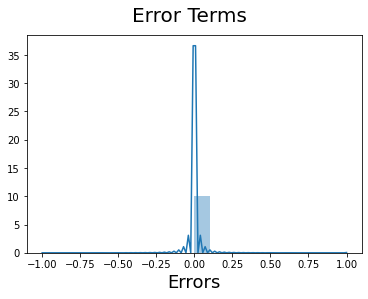

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_churn), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [62]:
# Dropping the constant from the dataframe 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#### Making Predictions - Test Data (LogReg + RFE + VIF)

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
# Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Viewing the shape of the 
X_train_rfe.shape

(199364, 26)

In [65]:
# Viewing the shape of the test data
X_test_new.shape

(85443, 26)

In [66]:
# Viweing the score of the Test Data
round(logreg.score(X_train_rfe, y_train)*100,2)

99.93

In [67]:
X_test_new.shape

(85443, 26)

In [68]:
# Viweing the score of the Test Data
round(logreg.score(X_test_new, y_test),4)*100

99.92

Analysis of Results - Sensitivity and Type 2 Error: PCA + LogReg + VIF

In [69]:
# Importing the required package for AUC Score and printing it
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
y_predicted = logreg.predict(X_test_new)
y_actual = y_test
print(confusion_matrix(y_actual, y_predicted))

[[85275    26]
 [   45    97]]


In [70]:
# False Positive and False Negative
cm =confusion_matrix(y_actual, y_predicted)

# Storing the values of the confusion matrix
TP = confusion_matrix(y_actual, y_predicted)[0][0]
FP = confusion_matrix(y_actual, y_predicted)[0][1]
FN = confusion_matrix(y_actual, y_predicted)[1][0]
TN = confusion_matrix(y_actual, y_predicted)[1][1]
total=sum(sum(cm))

print("Logistic Regression + RFE + VIF (Original Dataset):\n")
# Printing Type I and Type II Errors
print( "False Positive (Type I Error): ", FP)
print( "False Negative (Type II Error): ", FN)

# Accuracy
accuracy = round(100 - ((FP + FN)* 100 / len(y_predicted)),2)
print( "\nAccuracy: ", round(accuracy,2), '%')

# Sensitivity, Precision
sensitivity = round(TP*100 / (TP + FP),2)
print( "Precision: ", sensitivity, '%')

# AUC Score
print("AUC Score: {}".format(round(roc_auc_score(y_actual, y_predicted),2)))


Logistic Regression + RFE + VIF (Original Dataset):

False Positive (Type I Error):  26
False Negative (Type II Error):  45

Accuracy:  99.92 %
Precision:  99.97 %
AUC Score: 0.84


We are looking to model Credit Card Fraud. What are the things we would like to focus on and what are the errors we are likely to make?

Common Error: **The accuracy paradox**. Here, we should recognize that most transactions made are non-fraudulent, so it is obvious the model will be able to get those right.

#### What are the evaluation metrics we would like to look at?

We would like for the model to capture (maximize) the number of fraudulent credit card transaction and minimize the lost fraudulent transactions. This means:


1. **Minimize Type II Error**: We would like to minimize the number of fraud credit card transactions we were not able to capture. It is okay to have a relatively higher Type I error, as this would indicate that we call the customer to cross-check if they made the transaction intentionally or not.


2. **Maximize Sensitivity**: Sensitivoty is an indicator of True Positive Rate. Here, the aim is to get as many fraudulent credit card transactions as possible. The higher this is, it is an indication of great performance by the model!

3. **AUC Score**: This is also a great indicator of model performance


#### Logistic Regression with Original Dataset (Oversampling)

In [86]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_oversampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_oversampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_oversampled==0)))

Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 199014 

After OverSampling, the shape of train_X: (398028, 30)
After OverSampling, the shape of train_y: (398028,) 

After OverSampling, counts of label '1': 199014
After OverSampling, counts of label '0': 199014


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_oversampled, y_train_oversampled.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   44.1s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [88]:
clf.best_params_

{'C': 5.0}

In [89]:
lr1 = LogisticRegression(C=5,penalty='l2', verbose=5)
lr1.fit(X_train_oversampled, y_train_oversampled.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [90]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
from itertools import product
# from sklearn.metrics import plot_confusion_matrix

In [91]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

sm = SMOTE(random_state=2)
X_test_oversampled, y_test_oversampled = sm.fit_sample(X_test, y_test.ravel())

print('After OverSampling, the shape of X_test: {}'.format(X_test_oversampled.shape))
print('After OverSampling, the shape of y_test: {} \n'.format(y_test_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_oversampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_oversampled==0)))

Before OverSampling, counts of label '1': 142
Before OverSampling, counts of label '0': 85301 

After OverSampling, the shape of X_test: (170602, 30)
After OverSampling, the shape of y_test: (170602,) 

After OverSampling, counts of label '1': 85301
After OverSampling, counts of label '0': 85301


In [92]:
y_train_pre = lr1.predict(X_train_oversampled)

cnf_matrix_tra = confusion_matrix(y_train_oversampled, y_train_pre)

print("Recall metric in the train dataset: {}%".format(round(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1]),2)))


Recall metric in the train dataset: 96.91%


In [93]:
y_test_pre = lr1.predict(X_test_oversampled)

cnf_matrix_tra = confusion_matrix(y_test_oversampled, y_test_pre)

print("Recall metric in the TEST dataset: {}%".format(round(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1]),2)))


Recall metric in the TEST dataset: 93.07%


In [94]:
# Importing the required package for AUC Score and printing it
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
y_predicted = lr1.predict(X_test_oversampled)
y_actual = y_test_oversampled

print(confusion_matrix(y_actual, y_predicted))

[[83670  1631]
 [ 5912 79389]]


In [95]:
# False Positive and False Negative
cm =confusion_matrix(y_actual, y_predicted)

# Storing the values of the confusion matrix
TP = confusion_matrix(y_actual, y_predicted)[0][0]
FP = confusion_matrix(y_actual, y_predicted)[0][1]
FN = confusion_matrix(y_actual, y_predicted)[1][0]
TN = confusion_matrix(y_actual, y_predicted)[1][1]
total=sum(sum(cm))

print("Logistic Regression + RFE + VIF (Oversampled with SMOTE):\n")
# Printing Type I and Type II Errors
print( "False Positive (Type I Error): ", FP)
print( "False Negative (Type II Error): ", FN)

# Accuracy
accuracy = round(100 - ((FP + FN)* 100 / len(y_predicted)),2)
print( "\nAccuracy: ", round(accuracy,2), '%')

# Sensitivity, Precision
sensitivity = round(TP*100 / (TP + FP),2)
print( "Precision: ", sensitivity, '%')

# AUC Score
print("AUC Score: {}".format(round(roc_auc_score(y_actual, y_predicted),2)))

Logistic Regression + RFE + VIF (Original Dataset):

False Positive (Type I Error):  1631
False Negative (Type II Error):  5912

Accuracy:  95.58 %
Precision:  98.09 %
AUC Score: 0.96
